In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import mean_squared_error, r2_score


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/makogr/predict lenght hospital/microsoft dataset/LengthOfStay.csv')


In [ ]:
data.head()

,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay
0,1,8/29/2012,0,F,0,0,0,0,0,0,...,192.476918,12.0,1.390722,30.432418,96,6.5,4,9/1/2012,B,3
1,2,5/26/2012,5+,F,0,0,0,0,0,0,...,94.078507,8.0,0.943164,28.460516,61,6.5,1,6/2/2012,A,7
2,3,9/22/2012,1,F,0,0,0,0,0,0,...,130.530524,12.0,1.065750,28.843812,64,6.5,2,9/25/2012,B,3
3,4,8/9/2012,0,F,0,0,0,0,0,0,...,163.377028,12.0,0.906862,27.959007,76,6.5,1,8/10/2012,A,1
4,5,12/20/2012,0,F,0,0,0,1,0,1,...,94.886654,11.5,1.242854,30.258927,67,5.6,2,12/24/2012,E,4


In [ ]:
data

,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay
0,1,8/29/2012,0,F,0,0,0,0,0,0,...,192.476918,12.0,1.390722,30.432418,96,6.5,4,9/1/2012,B,3
1,2,5/26/2012,5+,F,0,0,0,0,0,0,...,94.078507,8.0,0.943164,28.460516,61,6.5,1,6/2/2012,A,7
2,3,9/22/2012,1,F,0,0,0,0,0,0,...,130.530524,12.0,1.065750,28.843812,64,6.5,2,9/25/2012,B,3
3,4,8/9/2012,0,F,0,0,0,0,0,0,...,163.377028,12.0,0.906862,27.959007,76,6.5,1,8/10/2012,A,1
4,5,12/20/2012,0,F,0,0,0,1,0,1,...,94.886654,11.5,1.242854,30.258927,67,5.6,2,12/24/2012,E,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,1/28/2012,3,M,0,0,0,0,0,0,...,171.422555,12.0,0.650323,30.063069,80,6.5,1,2/3/2012,B,6
99996,99997,8/6/2012,0,M,0,0,0,0,0,0,...,122.342450,12.0,1.521424,28.969548,61,6.5,1,8/7/2012,B,1
99997,99998,7/23/2012,1,M,0,0,1,0,0,0,...,108.288106,12.0,1.025677,26.354919,61,6.9,1,7/27/2012,C,4
99998,99999,12/19/2012,0,M,0,0,0,0,0,0,...,111.750731,16.0,1.035400,29.193462,59,5.6,1,12/23/2012,B,4


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   eid                         100000 non-null  int64  
 1   vdate                       100000 non-null  object 
 2   rcount                      100000 non-null  object 
 3   gender                      100000 non-null  object 
 4   dialysisrenalendstage       100000 non-null  int64  
 5   asthma                      100000 non-null  int64  
 6   irondef                     100000 non-null  int64  
 7   pneum                       100000 non-null  int64  
 8   substancedependence         100000 non-null  int64  
 9   psychologicaldisordermajor  100000 non-null  int64  
 10  depress                     100000 non-null  int64  
 11  psychother                  100000 non-null  int64  
 12  fibrosisandother            100000 non-null  int64  
 13  malnutrition   

In [ ]:
data.isnull().sum()

,0
eid,0
vdate,0
rcount,0
gender,0
dialysisrenalendstage,0
asthma,0
irondef,0
pneum,0
substancedependence,0
psychologicaldisordermajor,0


In [ ]:
# 'discharged'  'vdate'
data = data.drop(columns=['discharged', 'vdate'])

In [ ]:
# Label Encoding: gender and facid
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data['facid'] = label_encoder.fit_transform(data['facid'])

# One-Hot Encoding
data = pd.get_dummies(data, columns=['rcount'], prefix='rcount')

data.head()

,eid,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,...,respiration,secondarydiagnosisnonicd9,facid,lengthofstay,rcount_0,rcount_1,rcount_2,rcount_3,rcount_4,rcount_5+
0,1,0,0,0,0,0,0,0,0,0,...,6.5,4,1,3,True,False,False,False,False,False
1,2,0,0,0,0,0,0,0,0,0,...,6.5,1,0,7,False,False,False,False,False,True
2,3,0,0,0,0,0,0,0,0,0,...,6.5,2,1,3,False,True,False,False,False,False
3,4,0,0,0,0,0,0,0,0,0,...,6.5,1,0,1,True,False,False,False,False,False
4,5,0,0,0,0,1,0,1,0,0,...,5.6,2,4,4,True,False,False,False,False,False


In [ ]:

data['lengthofstay'].describe()


,lengthofstay
count,100000.00000
mean,4.00103
std,2.36031
min,1.00000
25%,2.00000
50%,4.00000
75%,6.00000
max,17.00000


Data Visualization

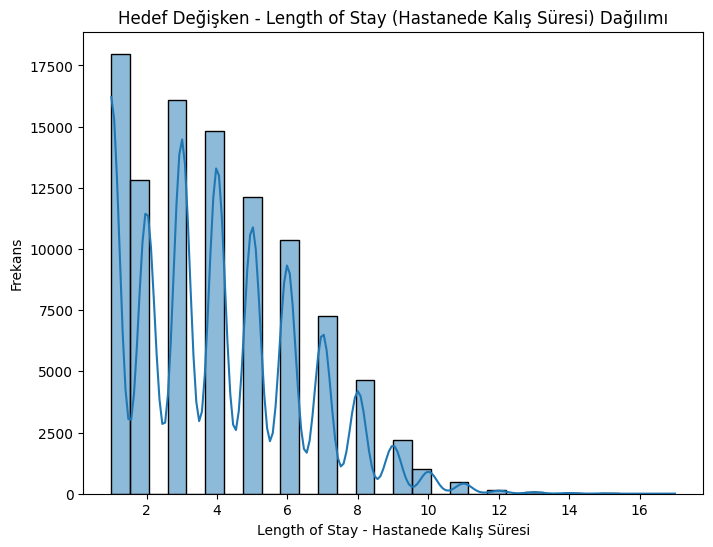

In [ ]:

plt.figure(figsize=(8, 6))
sns.histplot(data['lengthofstay'], bins=30, kde=True)
plt.title("Hedef Değişken - Length of Stay (Hastanede Kalış Süresi) Dağılımı")
plt.xlabel("Length of Stay - Hastanede Kalış Süresi")
plt.ylabel("Frekans")
plt.show()

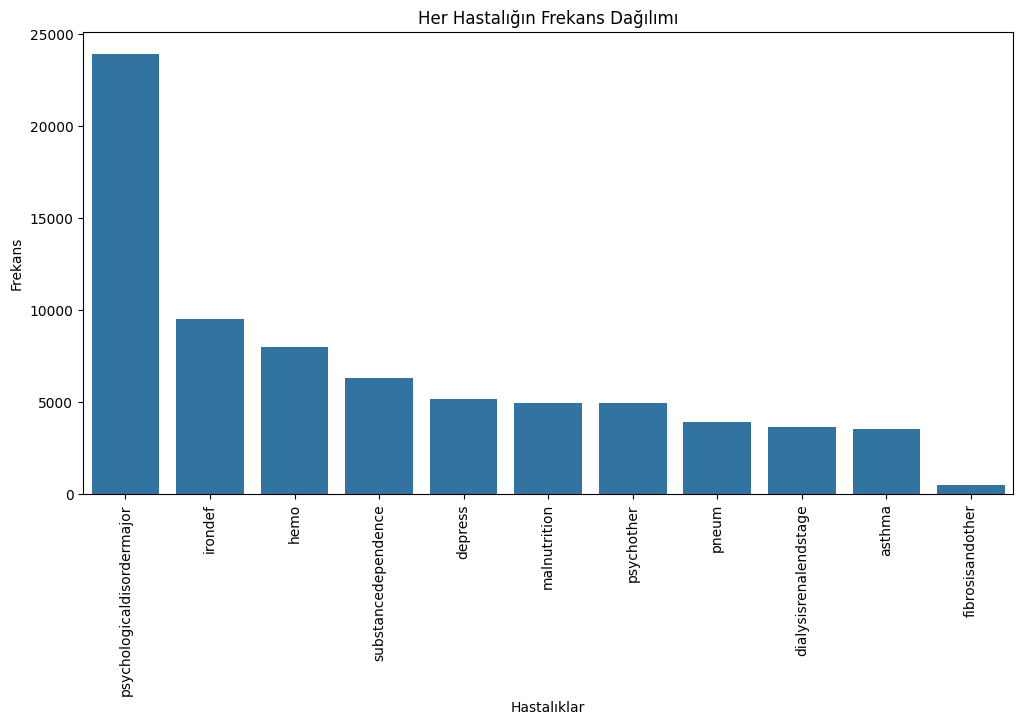

In [ ]:

disease_columns = [
    'dialysisrenalendstage', 'asthma', 'irondef', 'pneum', 'substancedependence',
    'psychologicaldisordermajor', 'depress', 'psychother', 'fibrosisandother',
    'malnutrition', 'hemo'
]

disease_counts = data[disease_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=disease_counts.index, y=disease_counts.values)
plt.title("Her Hastalığın Frekans Dağılımı")
plt.xlabel("Hastalıklar")
plt.ylabel("Frekans")
plt.xticks(rotation=90)
plt.show()

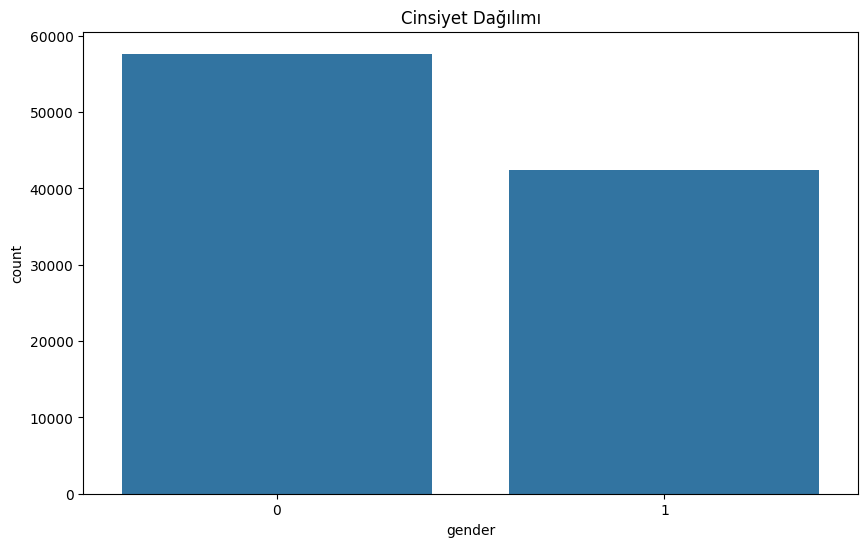

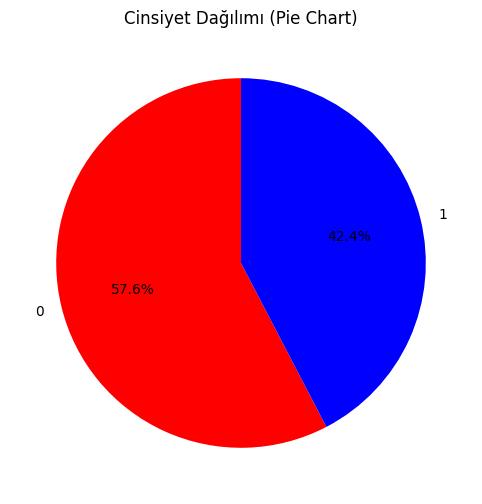

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=data)
plt.title('Cinsiyet Dağılımı')
plt.show()

gender_counts = data['gender'].value_counts()
plt.figure(figsize=(8, 6))
gender_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=["red", "blue"])
plt.title("Cinsiyet Dağılımı (Pie Chart)")
plt.ylabel('')
plt.show()


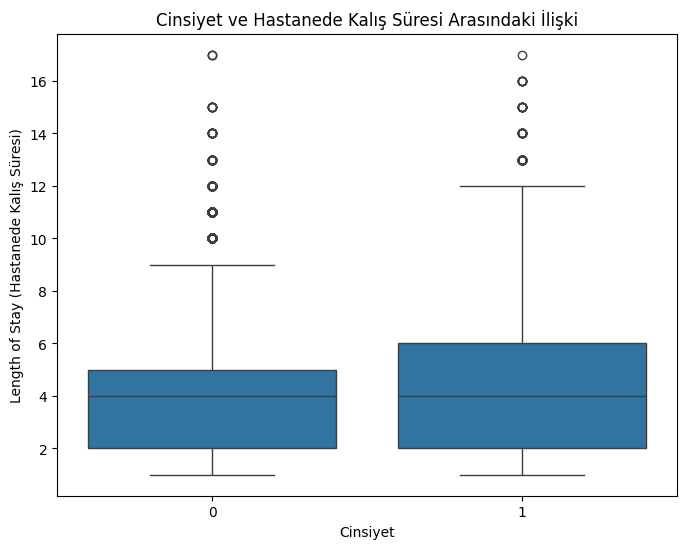

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='lengthofstay', data=data)
plt.title("Cinsiyet ve Hastanede Kalış Süresi Arasındaki İlişki")
plt.xlabel("Cinsiyet")
plt.ylabel("Length of Stay (Hastanede Kalış Süresi)")
plt.show()


In [ ]:

print(correlation_matrix['lengthofstay'].sort_values(ascending=False))

lengthofstay                  1.000000
facid                         0.360356
psychologicaldisordermajor    0.286724
hemo                          0.217696
irondef                       0.193838
psychother                    0.191695
malnutrition                  0.174397
dialysisrenalendstage         0.169695
bloodureanitro                0.148290
substancedependence           0.147886
pneum                         0.135461
depress                       0.121408
asthma                        0.082005
gender                        0.069575
fibrosisandother              0.062131
pulse                         0.006683
secondarydiagnosisnonicd9     0.006540
eid                           0.001543
bmi                           0.000132
glucose                      -0.003447
sodium                       -0.003546
creatinine                   -0.004026
neutrophils                  -0.010658
respiration                  -0.022291
hematocrit                   -0.064016
Name: lengthofstay, dtype

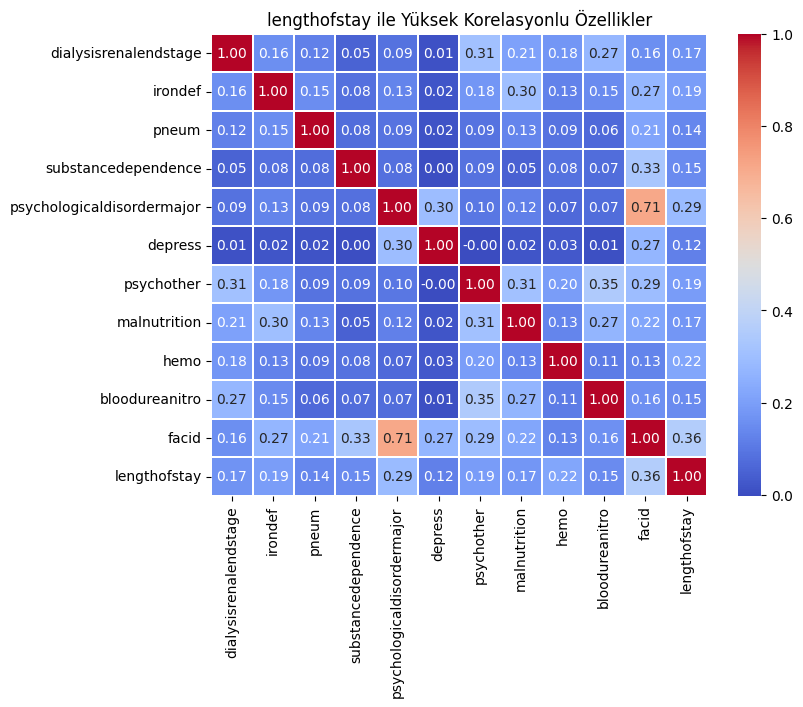

In [ ]:
threshold = 0.2
highly_correlated_features = correlation_matrix['lengthofstay'][abs(correlation_matrix['lengthofstay']) > threshold].index.tolist()


filtered_correlation_matrix = correlation_matrix.loc[high_correlation_columns, high_correlation_columns]


plt.figure(figsize=(8, 6))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.1)
plt.title("lengthofstay ile Yüksek Korelasyonlu Özellikler")
plt.show()

In [ ]:

X = data.drop('lengthofstay', axis=1)

y = data['lengthofstay']  # target value

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


print(f"Eğitim seti boyutu: {X_train.shape}")
print(f"Test seti boyutu: {X_test.shape}")


Eğitim seti boyutu: (70000, 30)
Test seti boyutu: (30000, 30)


In [ ]:
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

lr_y_pred = lr_model.predict(X_test)

lr_mae = mean_absolute_error(y_test, lr_y_pred)
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_rmse = mean_squared_error(y_test, lr_y_pred, squared=False)
lr_r2 = r2_score(y_test, lr_y_pred)

print(f"Linear Regression -Mean Absolute Error: {lr_mae}")
print(f"Linear Regression -Mean Squared Error: {lr_mse}")
print(f"Linear Regression -Root Mean Squared Error: {lr_rmse}")
print(f"Linear Regression -R-squared: {lr_r2}")

Linear Regression -Mean Absolute Error: 0.879073040011546
Linear Regression -Mean Squared Error: 1.314952924194328
Linear Regression -Root Mean Squared Error: 1.146713967907572
Linear Regression -R-squared: 0.7628541571805854


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# KNN
knn_model = KNeighborsRegressor()

knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)

knn_mae = mean_absolute_error(y_test, knn_y_pred)
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)

print(f"KNN - Mean Absolute Error: {knn_mae}")
print(f"KNN - Mean Squared Error: {knn_mse}")
print(f"KNN - R^2 Score: {knn_r2}")

KNN - Mean Absolute Error: 2.0286133333333334
KNN - Mean Squared Error: 6.348671999999999
KNN - R^2 Score: -0.1449544272822365


In [ ]:
# Random Forest
rf_model = RandomForestRegressor(random_state=123)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)


print(f"Random Forest - Mean Absolute Error: {rf_mae}")
print(f"Random Forest - Mean Squared Error: {rf_mse}")
print(f"Random Forest - R^2 Score: {rf_r2}")


Random Forest - Mean Absolute Error: 0.3903346666666667
Random Forest - Mean Squared Error: 0.4167084666666667
Random Forest - R^2 Score: 0.9248485031521565


In [ ]:
# Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(random_state=123)
gbr_model.fit(X_train, y_train)
gbr_y_pred = gbr_model.predict(X_test)

gbr_mae = mean_absolute_error(y_test, gbr_y_pred)
gbr_mse = mean_squared_error(y_test, gbr_y_pred)
gbr_r2 = r2_score(y_test, gbr_y_pred)

print(f"Gradient Boosting Regressor - Mean Absolute Error: {gbr_mae}")
print(f"Gradient Boosting Regressor - Mean Squared Error: {gbr_mse}")
print(f"Gradient Boosting Regressor - R^2 Score: {gbr_r2}")


Gradient Boosting Regressor - Mean Absolute Error: 0.438774858041385
Gradient Boosting Regressor - Mean Squared Error: 0.36750677980507884
Gradient Boosting Regressor - R^2 Score: 0.9337218059786262


In [ ]:
# Support Vector Regressor
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_y_pred = svr_model.predict(X_test)

svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_r2 = r2_score(y_test, svr_y_pred)
svr_mae = mean_absolute_error(y_test, svr_y_pred)

print(f"Support Vector Regressor - Mean Absolute Error: {svr_mae}")
print(f"Support Vector Regressor - Mean Squared Error: {svr_mse}")
print(f"Support Vector Regressor - R^2 Score: {svr_r2}")


Support Vector Regressor - Mean Absolute Error: 1.9163037522045188
Support Vector Regressor - Mean Squared Error: 5.553117793921444
Support Vector Regressor - R^2 Score: -0.001479806071273293


In [ ]:
# CatBoost Regressor
catboost_model = CatBoostRegressor(verbose=0, random_state=123)
catboost_model.fit(X_train, y_train)
catboost_y_pred = catboost_model.predict(X_test)

catboost_mse = mean_squared_error(y_test, catboost_y_pred)
catboost_r2 = r2_score(y_test, catboost_y_pred)
catboost_mae = mean_absolute_error(y_test, catboost_y_pred)


print(f"CatBoost - Mean Absolute Error: {catboost_mae}")
print(f"CatBoost - Mean Squared Error: {catboost_mse}")
print(f"CatBoost - R^2 Score: {catboost_r2}")


CatBoost - Mean Absolute Error: 0.29466330194739576
CatBoost - Mean Squared Error: 0.15251409015915227
CatBoost - R^2 Score: 0.9724947701266276


In [ ]:
# XGBoost Regressor
xgb_model = XGBRegressor(random_state=123)
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)

xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)
xgb_mae = mean_absolute_error(y_test, xgb_y_pred)

print(f"XGBoost - Mean Absolute Error: {xgb_mae}")
print(f"XGBoost - Mean Squared Error: {xgb_mse}")
print(f"XGBoost - R^2 Score: {xgb_r2}")


XGBoost - Mean Absolute Error: 0.33311991507411004
XGBoost - Mean Squared Error: 0.19766302853319787
XGBoost - R^2 Score: 0.9643523693084717


In [ ]:
# Model tahminlerini kontrol edelim

print(f"Linear Regression - Metrikler: {lr_mse}, {lr_r2}")
print(f"KNN - Metrikler: {knn_mse}, {knn_r2}")
print(f"Random Forest - Metrikler: {rf_mse}, {rf_r2}")
print(f"Gradient Boosting - Metrikler: {gbr_mse}, {gbr_r2}")
print(f"CatBoost - Metrikler: {catboost_mse}, {catboost_r2}")
print(f"SVR - Metrikler: {svr_mse}, {svr_r2}")
print(f"XGB - Metrikler: {xgb_mse}, {xgb_r2}")

Linear Regression - Metrikler: 1.3580228353678834, 0.757260452902561
KNN - Metrikler: 1.0412333333333332, 0.813884935382827
Random Forest - Metrikler: 0.4353662866666667, 0.9221805315090067
Gradient Boosting - Metrikler: 0.37715152646707945, 0.932586118335097
CatBoost - Metrikler: 0.15553582741556074, 0.9721987765440991
SVR - Metrikler: 0.6057243155634275, 0.8917299163191598
XGB - Metrikler: 0.19918903061494966, 0.9643959999084473


In [ ]:
results = {
    "Model": ["Linear Regression", "KNN", "Random Forest", "Gradient Boosting", "SVR", "CatBoost", "XGBoost"],
    "MAE":[ lr_mae, knn_mae, rf_mae, gbr_mae, svr_mae, catboost_mae, xgb_mae],
    "MSE": [ lr_mse, knn_mse, rf_mse, gbr_mse, svr_mse,catboost_mse, xgb_mse] ,
    "R^2": [ lr_r2, knn_r2, rf_r2, gbr_r2,  svr_r2, catboost_r2, xgb_r2]

}

results_df = pd.DataFrame(results)
print(results_df)


               Model       MAE       MSE       R^2
0  Linear Regression  0.879073  1.314953  0.762854
1                KNN  2.028613  6.348672 -0.144954
2      Random Forest  0.390335  0.416708  0.924849
3  Gradient Boosting  0.438775  0.367507  0.933722
4                SVR  1.916304  5.553118 -0.001480
5           CatBoost  0.294663  0.152514  0.972495
6            XGBoost  0.333120  0.197663  0.964352


In [ ]:
!pip install boruta

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 4.0 MB/s eta 0:00:00


In [ ]:
from boruta import BorutaPy

rf = RandomForestRegressor(random_state=42, n_jobs=-1)
boruta = BorutaPy(estimator=rf, n_estimators='auto', random_state=42)


boruta.fit(X_train.values, y_train.values)

selected_features_boruta = X_train.columns[boruta.support_].tolist()
print(f"Seçilen Özellikler (Boruta): {selected_features_boruta}")


Seçilen Özellikler (Boruta): ['dialysisrenalendstage', 'psychologicaldisordermajor', 'hemo', 'hematocrit', 'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine', 'bmi', 'pulse', 'respiration', 'facid', 'rcount_0', 'rcount_1', 'rcount_2', 'rcount_3', 'rcount_5+']


In [ ]:

X_train_boruta = X_train[selected_features_boruta]
X_test_boruta = X_test[selected_features_boruta]


In [ ]:
svr_model = SVR()

svr_model.fit(X_train_boruta, y_train)
svr_y_pred = svr_model.predict(X_test_boruta)

svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_r2 = r2_score(y_test, svr_y_pred)
svr_mae = mean_absolute_error(y_test, svr_y_pred)

print(f"Support Vector Regressor - Mean Absolute Error: {svr_mae}")
print(f"Support Vector Regressor - Mean Squared Error: {svr_mse}")
print(f"Support Vector Regressor - R^2 Score: {svr_r2}")

Support Vector Regressor - Mean Absolute Error: 1.4354203922893847
Support Vector Regressor - Mean Squared Error: 3.5016291278920098
Support Vector Regressor - R^2 Score: 0.36849694350560347


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


gb_model = GradientBoostingRegressor(random_state=42)

gb_model.fit(X_train[selected_features_boruta], y_train)

gb_y_pred = gb_model.predict(X_test[selected_features_boruta])

gb_mae = mean_absolute_error(y_test, gb_y_pred)
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)

print(f"Gradient Boosting - MAE: {gb_mae}")
print(f"Gradient Boosting - MSE: {gb_mse}")
print(f"Gradient Boosting - R^2: {gb_r2}")


Gradient Boosting - MAE: 0.47551971083217504
Gradient Boosting - MSE: 0.41983814466623165
Gradient Boosting - R^2: 0.9242840798079406


In [ ]:
from catboost import CatBoostRegressor

catboost_model = CatBoostRegressor(random_state=42, iterations=1000, learning_rate=0.1, depth=6, verbose=0)

catboost_model.fit(X_train[selected_features_boruta], y_train)

catboost_y_pred = catboost_model.predict(X_test[selected_features_boruta])

catboost_mae = mean_absolute_error(y_test, catboost_y_pred)
catboost_mse = mean_squared_error(y_test, catboost_y_pred)
catboost_r2 = r2_score(y_test, catboost_y_pred)

print(f"CatBoost - MAE: {catboost_mae}")
print(f"CatBoost - MSE: {catboost_mse}")
print(f"CatBoost - R^2: {catboost_r2}")


CatBoost - MAE: 0.3414446075301337
CatBoost - MSE: 0.23169919788049756
CatBoost - R^2: 0.9585849686090765


In [ ]:

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'CatBoost': CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=10, verbose=0),
    'SVR': SVR(),
    'XGB': XGBRegressor(objective='reg:squarederror', random_state=42)
}

results = {}
for model_name, model in models.items():

    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)


    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)


    results[model_name] = {
        'MAE': mae,
        'MSE': mse,
        'R2': r2
    }


results_df = pd.DataFrame(results).T
print(results_df)

best_model = results_df['R2'].idxmax()
print(f'En iyi model: {best_model}')


                        MAE       MSE        R2
Linear Regression  0.886928  1.358023  0.757260
Random Forest      0.396533  0.437633  0.921775
Gradient Boosting  0.444564  0.377152  0.932586
CatBoost           0.280597  0.164848  0.970534
SVR                0.537006  0.605724  0.891730
XGB                0.333099  0.199189  0.964396
En iyi model: CatBoost
